# Курсовой проект для курса "Python для Data Science"
Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить
модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать
цены для квартир из файла test.csv.

Целевая переменная:
Price

Основная метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Вспомогательная метрика:
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

Сдача проекта:
1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb).
2. Приложить файл с названием по образцу PNagornyi_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

Сроки сдачи:
Сдать проект за 72 часа после Урока 10 ("Вебинар. Консультация по итоговому проекту").

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR, Ridge
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.metrics import r2_score as r2,mean_squared_error as MSE, mean_absolute_error as MAE

In [2]:
train_data_file = pd.read_csv("train.csv")
train_data = train_data_file.copy()

train_data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [3]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


## Очистим данные

#### Удаляем столбец 'Healthcare_1', т.к. заполненных данных всего лишь около половины

In [5]:
train_data.drop('Healthcare_1',axis=1,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


#### Изучим данные о нереальном годе в HouseYear

In [6]:
train_data.loc[train_data.HouseYear>2021].shape

(2, 19)

In [7]:
train_data.loc[train_data.HouseYear>2021]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


#### Исправим года в HouseYear руками

In [8]:
train_data.loc[1497, 'HouseYear'] = 2008
train_data.loc[4189, 'HouseYear'] = 1968

In [9]:
train_data.loc[[1497, 4189]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,2008,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,1968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


#### Изучим данные о нереальном кол-ве комнат в Rooms

In [10]:
train_data.loc[train_data.Rooms>5]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [11]:
train_data.groupby("Rooms")["Square"].mean()

Rooms
0.0      81.620358
1.0      41.323277
2.0      56.788214
3.0      76.903234
4.0      98.377544
5.0     122.614941
6.0      59.414334
10.0     59.964120
19.0     42.006046
Name: Square, dtype: float64

#### Если посмотреть на среднюю площадь в квартирах, сгруппированных по комнатам, то можно приравнять:
- 10 комнат к 2-м
- 19 комнат к 1-й
- 6 комнат к 2-м
- 10 комнат к 2-м

In [12]:
train_data.loc[[377, 2170, 8849],'Rooms'] = 2
train_data.loc[1454,'Rooms'] = 1

In [13]:
train_data.loc[[377, 2170, 8849, 1454]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
2170,14003,99,2.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704


In [14]:
train_data.groupby("Rooms")["Square"].mean()

Rooms
0.0     81.620358
1.0     41.323462
2.0     56.790526
3.0     76.903234
4.0     98.377544
5.0    122.614941
Name: Square, dtype: float64

In [15]:
train_data.loc[train_data.Rooms==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


#### С квартирами, у которых 0 комнат делаем следующее:
- 138 м2 - 5 комнат
- 212 и 2 м2 - удаляем
- 38 и 41 м2 - 1 комната
- 49 м2 - 2 комнаты
- 81 м2 - 3 комнаты
- 87 м2 - 4 комнаты

In [16]:
train_data.drop([1981, 4853],axis=0,inplace=True)
train_data.loc[1397,'Rooms'] = 5
train_data.loc[[2269, 6149],'Rooms'] = 1
train_data.loc[3911,'Rooms'] = 2
train_data.loc[4366,'Rooms'] = 3
train_data.loc[8834,'Rooms'] = 4

In [17]:
train_data.loc[[1397, 2269, 6149, 3911, 4366, 8834]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,5.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
2269,7317,27,1.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
6149,3159,88,1.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
3911,770,28,2.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,3.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
8834,9443,27,4.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [18]:
train_data.groupby("Rooms")["Square"].mean()

Rooms
1.0     41.322879
2.0     56.788644
3.0     76.905286
4.0     98.307246
5.0    123.447192
Name: Square, dtype: float64

#### Изучим данные площади Square, LifeSquare

In [19]:
train_data.loc[train_data.Square<17]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
5617,15877,57,3.0,16.547242,16.698571,8.0,5,5.0,1962,0.133215,B,B,49,11395,3,3,4,A,77835.185808
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
7767,6927,21,1.0,16.117154,8.822988,0.0,2,5.0,1965,0.194489,B,B,47,8004,3,3,5,B,79913.267856


#### Удалим записи с Square меньше 17м2

In [20]:
index_array_square = train_data.loc[train_data.Square<17].index
index_array_square

Int64Index([ 212, 1316, 1608, 3280, 3413, 4739, 4900, 5617, 6392, 7767, 8030,
            8283, 9294, 9613],
           dtype='int64')

In [21]:
train_data.drop(index_array_square, axis=0, inplace=True)
train_data.loc[train_data.Square<17].shape

(0, 19)

In [22]:
train_data.loc[train_data.Square<train_data.LifeSquare].shape

(470, 19)

#### Поменяем местами LifeSquare и Square, где LifeSquare > Square

In [23]:
def square_change_value(df):
    lifesquare_data = df.loc[df.Square < df.LifeSquare, 'LifeSquare']
    index_square = df.loc[df.Square < df.LifeSquare, 'LifeSquare'].index
    df.loc[index_square, 'LifeSquare'] = df.loc[index_square, 'Square']
    df.loc[index_square, 'Square'] = lifesquare_data
    return df

In [24]:
train_data.loc[train_data.Square<train_data.LifeSquare].shape

(470, 19)

In [25]:
train_data = square_change_value(train_data)

In [26]:
train_data.loc[train_data.Square<train_data.LifeSquare].shape

(0, 19)

In [27]:
train_data.loc[train_data.Square>200]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,263.542020,48.449873,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4328,16550,27,3.0,7480.592129,81.694417,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4690,2307,102,1.0,410.639749,409.425181,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562
8437,15886,85,3.0,461.463614,78.059331,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978
9910,16568,27,4.0,201.627361,200.334539,25.0,1,2.0,2013,0.041116,B,B,53,14892,4,1,4,B,528560.506016


#### Предполагаем, что в квартире 4328 перепутаны Square и LifeSquare, а также делитель

In [28]:
train_data.loc[4328, 'Square'] = 81.694417
train_data.loc[4328, 'LifeSquare'] = 74.80592129

In [29]:
train_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9984.000000,9984.000000,9984.000000,9984.000000,7871.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000
mean,8381.533253,50.430288,1.889022,56.525058,36.084233,6.280849,8.526442,12.616887,1984.868690,0.118830,24.695413,5354.040064,8.047977,1.319411,4.232472,214106.438744
std,4859.781928,43.604856,0.812050,21.455479,19.241597,28.583025,5.233916,6.770353,18.412377,0.119059,17.530697,4006.529984,23.849431,1.493195,4.808081,92757.167170
min,0.000000,0.000000,1.000000,17.414181,0.370619,0.000000,1.000000,0.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.750000,20.000000,1.000000,41.884258,22.804426,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153916.907311
50%,8393.500000,36.000000,2.000000,52.671446,32.786353,6.000000,7.000000,13.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192290.039215
75%,12591.250000,75.000000,2.000000,66.005696,45.048935,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,5.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [30]:
square_mean_data = train_data.groupby("Rooms")['LifeSquare', "Square"].median()

In [31]:
square_mean_data["LifeSquare_share"] = square_mean_data["LifeSquare"] / square_mean_data["Square"]
square_mean_data.reset_index(inplace=True)
square_mean_data

,Rooms,LifeSquare,Square,LifeSquare_share
0,1.0,21.670221,40.531648,0.534649
1,2.0,32.553797,55.902977,0.582327
2,3.0,46.962628,77.483948,0.606095
3,4.0,64.978480,98.686703,0.658432
4,5.0,81.122369,117.855969,0.688318


#### Предполагаем, что значение LifeSquare должно быть не менее LifeSquare_share - 50%. Если не так, то усредняем. По тем же правилам заполняем пустые значения.

In [32]:
square_mean_data["LifeSquare_min"] = square_mean_data.LifeSquare_share * 0.5
square_mean_data

,Rooms,LifeSquare,Square,LifeSquare_share,LifeSquare_min
0,1.0,21.670221,40.531648,0.534649,0.267325
1,2.0,32.553797,55.902977,0.582327,0.291163
2,3.0,46.962628,77.483948,0.606095,0.303047
3,4.0,64.978480,98.686703,0.658432,0.329216
4,5.0,81.122369,117.855969,0.688318,0.344159


In [33]:
square_mean_data.drop(['LifeSquare', 'Square'], axis=1, inplace=True)
square_mean_data

,Rooms,LifeSquare_share,LifeSquare_min
0,1.0,0.534649,0.267325
1,2.0,0.582327,0.291163
2,3.0,0.606095,0.303047
3,4.0,0.658432,0.329216
4,5.0,0.688318,0.344159


In [34]:
train_data = pd.merge(train_data, square_mean_data, on='Rooms', how='left')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9983
Data columns (total 21 columns):
Id                  9984 non-null int64
DistrictId          9984 non-null int64
Rooms               9984 non-null float64
Square              9984 non-null float64
LifeSquare          7871 non-null float64
KitchenSquare       9984 non-null float64
Floor               9984 non-null int64
HouseFloor          9984 non-null float64
HouseYear           9984 non-null int64
Ecology_1           9984 non-null float64
Ecology_2           9984 non-null object
Ecology_3           9984 non-null object
Social_1            9984 non-null int64
Social_2            9984 non-null int64
Social_3            9984 non-null int64
Helthcare_2         9984 non-null int64
Shops_1             9984 non-null int64
Shops_2             9984 non-null object
Price               9984 non-null float64
LifeSquare_share    9984 non-null float64
LifeSquare_min      9984 non-null float64
dtypes: float64(9), int64(9), ob

In [35]:
train_data.loc[(train_data.LifeSquare / train_data.Square) < train_data.LifeSquare_min].shape

(203, 21)

In [36]:
train_data.loc[(train_data.LifeSquare / train_data.Square) < train_data.LifeSquare_min, 'LifeSquare'] = train_data.Square * train_data.LifeSquare_share

In [37]:
train_data.loc[(train_data.LifeSquare / train_data.Square) < train_data.LifeSquare_min].shape

(0, 21)

In [38]:
train_data.LifeSquare = train_data.LifeSquare.fillna(train_data.Square * train_data.LifeSquare_share)

In [39]:
train_data.drop(['LifeSquare_share', 'LifeSquare_min'], axis=1, inplace=True)

In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9983
Data columns (total 19 columns):
Id               9984 non-null int64
DistrictId       9984 non-null int64
Rooms            9984 non-null float64
Square           9984 non-null float64
LifeSquare       9984 non-null float64
KitchenSquare    9984 non-null float64
Floor            9984 non-null int64
HouseFloor       9984 non-null float64
HouseYear        9984 non-null int64
Ecology_1        9984 non-null float64
Ecology_2        9984 non-null object
Ecology_3        9984 non-null object
Social_1         9984 non-null int64
Social_2         9984 non-null int64
Social_3         9984 non-null int64
Helthcare_2      9984 non-null int64
Shops_1          9984 non-null int64
Shops_2          9984 non-null object
Price            9984 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.8+ MB


#### Исправим этажность домов: HouseFloor > Floor, то приравниваем к Floor

In [41]:
train_data.loc[train_data.HouseFloor < train_data.Floor].shape

(1818, 19)

In [42]:
train_data.loc[train_data.HouseFloor < train_data.Floor, 'HouseFloor'] = train_data.Floor
train_data.loc[train_data.HouseFloor < train_data.Floor].shape

(0, 19)

#### Сделаем копию датафрейма с исправленными данными для гипотез

In [43]:
data = train_data.copy()

## Гипотеза 1
### Если использовать все показания и просто создать дамми-переменные, то этого будет достаточно для решения.

#### Работаем с дамми-переменными

In [44]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000,9984.000000
mean,8381.533253,50.430288,1.889022,56.525058,36.444931,6.280849,8.526442,13.437700,1984.868690,0.118830,24.695413,5354.040064,8.047977,1.319411,4.232472,214106.438744
std,4859.781928,43.604856,0.812050,21.455479,18.056324,28.583025,5.233916,6.087045,18.412377,0.119059,17.530697,4006.529984,23.849431,1.493195,4.808081,92757.167170
min,0.000000,0.000000,1.000000,17.414181,10.140743,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4166.750000,20.000000,1.000000,41.884258,23.316892,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153916.907311
50%,8393.500000,36.000000,2.000000,52.671446,33.197429,6.000000,7.000000,14.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192290.039215
75%,12591.250000,75.000000,2.000000,66.005696,44.671847,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249100.769116
max,16798.000000,209.000000,5.000000,641.065193,638.163193,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [45]:
data['DistrictId']=data['DistrictId'].astype(object)

In [46]:
data=pd.get_dummies(data)

In [47]:
data.head()

,Id,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,DistrictId_205,DistrictId_207,DistrictId_208,DistrictId_209,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,...,0,0,0,0,0,1,0,1,0,1
1,15053,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,...,0,0,0,0,0,1,0,1,0,1
2,4765,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,...,0,0,0,0,0,1,0,1,0,1
3,5809,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,...,0,0,0,0,0,1,0,1,0,1
4,10783,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,...,0,0,0,0,0,1,0,1,0,1


#### Строим модели

In [48]:
X = data.drop(['Price', 'Id'], axis=1)
y = data['Price']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [50]:
lr=LR()

In [51]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred=lr.predict(X_test)

In [53]:
def check_result(y_t, y_p):
    print(f'R2 = {r2(y_t,y_p)}\nMSE = {MSE(y_t,y_p)}\nMAE = {MAE(y_t,y_p)}')

In [54]:
check_result(y_test,y_pred)

R2 = -2576827094.024087
MSE = 2.220648720644122e+19
MAE = 192546337.5213834


#### Результат не удовлетворительный
## Гипотеза 2
### Избавляемся от DistrictID, выводя среднюю цену по району, как в вебинаре

In [55]:
data = train_data.copy()

In [56]:
stats1 = data.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price': 'mean_price'})
stats1.head()

,DistrictId,Rooms,mean_price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147053.553961
4,1,2.0,198777.278269


In [57]:
def join_stats1(df,stats1,source_df,mode='train'):
    df=pd.merge(df,stats1,on=['DistrictId','Rooms'],how='left')
    if mode=='test':
        df['mean_price']=df['mean_price'].fillna(source_df['mean_price'].mean())
    return df

In [58]:
data=join_stats1(data,stats1,data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9984 entries, 0 to 9983
Data columns (total 20 columns):
Id               9984 non-null int64
DistrictId       9984 non-null int64
Rooms            9984 non-null float64
Square           9984 non-null float64
LifeSquare       9984 non-null float64
KitchenSquare    9984 non-null float64
Floor            9984 non-null int64
HouseFloor       9984 non-null float64
HouseYear        9984 non-null int64
Ecology_1        9984 non-null float64
Ecology_2        9984 non-null object
Ecology_3        9984 non-null object
Social_1         9984 non-null int64
Social_2         9984 non-null int64
Social_3         9984 non-null int64
Helthcare_2      9984 non-null int64
Shops_1          9984 non-null int64
Shops_2          9984 non-null object
Price            9984 non-null float64
mean_price       9984 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.6+ MB


In [59]:
features1=data[['Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear', 'mean_price']]
target=data['Price']

In [60]:
features1.head()

,Rooms,Square,Floor,HouseFloor,HouseYear,mean_price
0,2.0,47.981561,7,9.0,1969,213160.076297
1,3.0,65.683640,7,9.0,1978,303643.563728
2,2.0,44.947953,8,12.0,1968,259938.729121
3,2.0,53.352981,8,17.0,1977,172368.882269
4,1.0,39.649192,11,12.0,1976,155748.415754


In [61]:
X_train,X_test,y_train,y_test=train_test_split(features1,target,test_size=0.3, random_state=54)

In [62]:
model1=LR()
model2=Ridge()
model3=RF()

In [63]:
%%time
model1.fit(X_train,y_train)

Wall time: 3 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
%%time
model2.fit(X_train,y_train)

Wall time: 5 ms


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [65]:
%%time
model3.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 326 ms


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [66]:
y_pred_1=model1.predict(X_test)
y_pred_2=model2.predict(X_test)
y_pred_3=model3.predict(X_test)

In [67]:
check_result(y_test,y_pred_1)

R2 = 0.6958560334220363
MSE = 2744106357.748744
MAE = 34269.204911867404


In [68]:
check_result(y_test,y_pred_2)

R2 = 0.6958600705831581
MSE = 2744069932.8949943
MAE = 34269.21684560119


In [69]:
check_result(y_test,y_pred_3)

R2 = 0.7197120934422752
MSE = 2528867611.7399783
MAE = 31505.50356598308


In [70]:
y_pred_train1=model1.predict(X_train)
check_result(y_train,y_pred_train1)

R2 = 0.6938591412940689
MSE = 2577864912.502829
MAE = 33120.28451048608


In [71]:
y_pred_train2=model2.predict(X_train)
check_result(y_train,y_pred_train2)

R2 = 0.6938591372401673
MSE = 2577864946.6387835
MAE = 33120.49877437893


In [72]:
y_pred_train3=model3.predict(X_train)
check_result(y_train,y_pred_train3)

R2 = 0.9527299424906311
MSE = 398038416.63109565
MAE = 11836.165056784941


#### Random Forest дает наибольшее значение r2, но он явно переобучился
## Гипотеза 3
### Подберем оптимальные коэффициенты для Random Forest

In [73]:
from sklearn.model_selection import GridSearchCV

In [135]:
params={
        'min_samples_leaf':[3,5,7,10],
        'n_estimators':[25,50,75,100],
        'max_depth':[3,5,7]    
        }
regr=GridSearchCV(RF(),param_grid=params,cv=5)

In [136]:
%%time
regr.fit(X_train,y_train)

Wall time: 1min 42s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7],
       

In [137]:
regr.best_params_

{'max_depth': 7, 'min_samples_leaf': 5, 'n_estimators': 100}

In [138]:
regr.best_score_

0.7367262372382362

In [139]:
model7=RF(n_estimators=100,max_depth=7,min_samples_leaf=5)

In [140]:
%%time
model7.fit(X_train,y_train)

Wall time: 1.1 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [141]:
y_pred_7=model7.predict(X_test)
y_pred_train_7=model7.predict(X_train)

In [142]:
check_result(y_test,y_pred_7)

R2 = 0.7365173603276198
MSE = 2377243891.4913054
MAE = 31018.26273475373


In [143]:
check_result(y_train,y_pred_train_7)

R2 = 0.7871089119130679
MSE = 1792653448.7544994
MAE = 27268.62009202426


#### R2 хорошее, но модель все еще переобучена

In [144]:
feature_names = X_train.columns.values.tolist()
feature_names

['Rooms', 'Square', 'Floor', 'HouseFloor', 'HouseYear', 'mean_price']

In [145]:
for x,y in zip(feature_names, model7.feature_importances_):
    print(x, y)

Rooms 0.021017458675168722
Square 0.10694426424006749
Floor 0.007462568036616058
HouseFloor 0.01637820411193543
HouseYear 0.029737527951527214
mean_price 0.8184599769846851


## Гипотеза 4
### Испытаем модель обучения без учителя TSNE

In [146]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [148]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [149]:
%%time
X_train_tsne = tsne.fit_transform(X_train_scaled)

Wall time: 1min 33s


In [150]:
print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(6988, 6)
После:	(6988, 2)


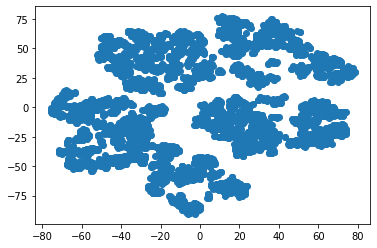

In [151]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

#### Разделим данные на 3 кластера

In [152]:
from sklearn.cluster import KMeans

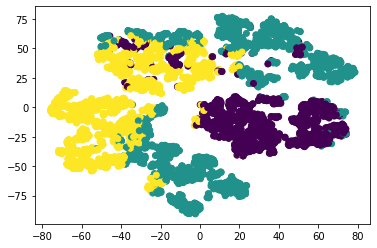

In [153]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

In [154]:
labels_test = kmeans.predict(X_test_scaled)

In [155]:
y_train.mean()

213203.67164969875

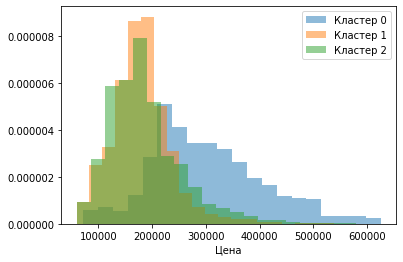

In [156]:
plt.hist(y_train[labels_train == 0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 1], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train == 2], bins=20, density=True, alpha=0.5)

plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

plt.show()

In [157]:
model9 = RF(n_estimators=100,max_depth=7,min_samples_leaf=7)
model9.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [158]:
y_test_pred_9 = model9.predict(X_test_scaled)

In [159]:
check_result(y_test, y_test_pred_9)

R2 = 0.7370144385479813
MSE = 2372759056.4964185
MAE = 31024.989980632017


#### Модель для кластера 0:

In [160]:
model9.fit(X_train_scaled.loc[labels_train == 0], y_train[labels_train == 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [161]:
y_test_pred_9_0 = model9.predict(X_test_scaled.loc[labels_test == 0])
y_train_pred_9_0 = model9.predict(X_train_scaled.loc[labels_train == 0])

In [162]:
r2(y_test[labels_test == 0], y_test_pred_9_0)

0.5908101349924082

#### Модель для кластера 1:

In [163]:
model9.fit(X_train_scaled.loc[labels_train == 1], y_train[labels_train == 1])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [164]:
y_test_pred_9_1 = model9.predict(X_test_scaled.loc[labels_test == 1])
y_train_pred_9_1 = model9.predict(X_train_scaled.loc[labels_train == 1])

In [165]:
r2(y_test[labels_test == 1], y_test_pred_9_1)

0.5810405902154638

#### Модель для кластера 2:

In [166]:
model9.fit(X_train_scaled.loc[labels_train == 2], y_train[labels_train == 2])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=7, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [167]:
y_test_pred_9_2 = model9.predict(X_test_scaled.loc[labels_test == 2])
y_train_pred_9_2 = model9.predict(X_train_scaled.loc[labels_train == 2])

In [168]:
r2(y_test[labels_test == 2], y_test_pred_9_2)

0.6637633326139393

#### Объединим данные

In [169]:
y_test_all = np.hstack([y_test[labels_test == 0], y_test[labels_test == 1], y_test[labels_test == 2]])
y_test_pred_all = np.hstack([y_test_pred_9_0, y_test_pred_9_1, y_test_pred_9_2])

check_result(y_test_all, y_test_pred_all)

R2 = 0.7420949136945455
MSE = 2326921013.720392
MAE = 30322.034333699725


In [170]:
y_train_all = np.hstack([y_train[labels_train == 0], y_train[labels_train == 1], y_train[labels_train == 2]])
y_train_pred_all = np.hstack([y_train_pred_9_0, y_train_pred_9_1, y_train_pred_9_2])

check_result(y_train_all, y_train_pred_all)

R2 = 0.8054008417411296
MSE = 1638625906.3838196
MAE = 25655.895103048566


## Итоги:
### R2 в моделе TSNE имеет приемлемое значение и приемлимую ошибку переобучения. Будем дальше использовать эту модель для предсказания цен на недвижимость

In [171]:
test_data_file = pd.read_csv("test.csv")
test_data = test_data_file.copy()

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [172]:
test_data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


#### Изучим и исправим данные о нереальном кол-ве комнат в Rooms

In [173]:
test_data.loc[test_data.Rooms>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [174]:
test_data.loc[3398,'Rooms'] = 2

In [175]:
test_data.loc[[3398]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,2.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [176]:
test_data.loc[test_data.Rooms==0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,0.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [177]:
test_data.loc[2406,'Rooms'] = 5
test_data.loc[2524,'Rooms'] = 3

In [178]:
test_data.loc[[2406, 2524]]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2406,3343,58,5.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B
2524,10729,27,3.0,76.345154,42.820796,12.0,14,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B


In [179]:
test_data.groupby("Rooms")["Square"].mean()

Rooms
1.0     40.943143
2.0     56.687262
3.0     77.200526
4.0     94.501365
5.0    115.918374
6.0    167.101957
Name: Square, dtype: float64

#### Изучим и исправим данные площади Square

In [180]:
test_data.loc[test_data.Square<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
66,9011,53,1.0,1.378543,1.353573,1.0,1,1.0,1977,0.049637,B,B,34,7759,0,229.0,1,3,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
837,2138,27,1.0,5.647458,1.501582,1.0,1,1.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B
1165,10120,6,1.0,5.100672,3.861780,1.0,3,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
4490,1165,27,1.0,2.372101,1.899119,1.0,2,17.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B
4540,7855,6,1.0,4.967143,2.968086,1.0,3,1.0,2018,0.243205,B,B,5,1564,0,540.0,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [181]:
test_data.loc[test_data.Square<10, 'Square'] = test_data.loc[test_data.Square<10, 'Square'] * 10

In [182]:
test_data.loc[4713,'Square'] = test_data.loc[4713,'LifeSquare']

In [183]:
test_data.loc[test_data.Square<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


#### Поменяем местами LifeSquare и Square, где LifeSquare > Square

In [184]:
test_data.loc[test_data.Square < test_data.LifeSquare].shape

(238, 19)

In [185]:
test_data = square_change_value(test_data)

In [186]:
test_data.loc[test_data.Square < test_data.LifeSquare].shape

(0, 19)

#### Исправим этажность домов: HouseFloor > Floor, то приравниваем к Floor

In [187]:
test_data.loc[test_data.HouseFloor < test_data.Floor].shape

(884, 19)

In [188]:
test_data.loc[test_data.HouseFloor < test_data.Floor, 'HouseFloor'] = test_data.Floor
test_data.loc[test_data.HouseFloor < test_data.Floor].shape

(0, 19)

In [189]:
test_data = join_stats1(test_data,stats1,data,mode='test')

In [190]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
mean_price       5000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 820.3+ KB


In [191]:
test = test_data.copy()

In [192]:
test['Price9']=model9.predict(test.loc[:,feature_names]) 

In [193]:
test['Price1']=model1.predict(test.loc[:,feature_names])
test['Price2']=model2.predict(test.loc[:,feature_names])
test['Price3']=model3.predict(test.loc[:,feature_names])
test['Price7']=model7.predict(test.loc[:,feature_names])

In [194]:
test.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,mean_price,Price9,Price1,Price2,Price3,Price7
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,NaN,0,0,B,172368.882269,399065.848956,159955.491025,159960.657348,168553.419587,173946.937562
1,15856,74,2.0,69.263183,NaN,1.0,6,6.0,1977,0.075779,...,NaN,0,2,B,236250.931918,399065.848956,235697.289929,235693.602836,257570.183203,248097.914302
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.000000,...,4702.0,5,5,B,214106.438744,400033.665121,168124.798109,168119.723940,160452.651485,171153.385917
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,NaN,3,3,B,206507.966738,399065.848956,242348.048190,242348.066065,308313.938155,265696.684357
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,...,NaN,0,0,A,122751.994954,399065.848956,142822.050338,142820.619236,141973.995582,126561.155254
5,7633,53,1.0,40.675627,NaN,1.0,21,21.0,1977,0.049637,...,229.0,1,3,B,195994.138322,399065.848956,213859.023319,213853.470697,204782.467032,202271.742812
6,13329,23,2.0,68.099538,64.843025,1.0,2,17.0,1977,0.075779,...,NaN,0,2,B,135324.353513,400033.665121,140456.570233,140460.194264,148318.675485,157374.526436
7,5502,32,2.0,48.193897,32.857644,6.0,5,14.0,1972,0.135650,...,350.0,3,11,B,233425.301529,399065.848956,220488.665001,220490.066105,224866.423269,209100.573511
8,4220,96,3.0,72.277106,45.968758,9.0,17,17.0,1997,0.041116,...,NaN,1,4,B,314107.768537,399065.848956,322760.130415,322764.842234,314469.916713,324745.305575
9,11538,6,3.0,80.219400,47.660260,9.0,13,17.0,2014,0.243205,...,540.0,0,0,B,214217.202464,399065.848956,226895.476814,226905.364346,209133.093596,214936.379237


In [195]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,mean_price,Price9,Price1,Price2,Price3,Price7
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.908600,56.634056,35.995277,5.976800,8.632000,13.395000,1984.392600,0.119874,...,8.262600,1146.657263,1.31940,4.242800,214213.593000,399087.733460,214019.408352,214019.600949,214408.333881,213931.677361
std,4832.674037,44.179466,0.811405,19.333667,17.174611,9.950018,5.483228,6.231945,18.573149,0.120070,...,23.863762,1044.744231,1.47994,4.777365,71485.597609,1341.380528,74181.116957,74180.603288,79196.504953,74739.956643
min,1.000000,0.000000,1.000000,13.305531,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,84250.557673,385235.532454,58879.904706,58880.690398,64816.229009,68804.792450
25%,4221.750000,21.000000,1.000000,42.015628,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,...,0.000000,325.000000,0.00000,1.000000,166014.055413,399065.848956,163884.698436,163880.464421,163026.969430,166029.560558
50%,8320.500000,37.000000,2.000000,52.957761,32.892831,6.000000,7.000000,14.000000,1977.000000,0.072158,...,2.000000,900.000000,1.00000,3.000000,198777.278269,399065.848956,197541.565575,197545.052219,195125.121190,197238.763279
75%,12598.250000,77.000000,2.000000,66.416189,45.083374,9.000000,12.000000,17.000000,2000.000000,0.195781,...,5.000000,1548.000000,2.00000,6.000000,246330.217412,399065.848956,247478.709817,247475.281228,247777.977098,247247.240093
max,16795.000000,212.000000,6.000000,303.071094,168.729035,620.000000,78.000000,99.000000,2020.000000,0.521867,...,141.000000,4849.000000,6.00000,23.000000,593618.746096,403207.902290,652206.128733,652185.327742,583322.268316,538672.612030
